# Intel® Embree with Triangle Geometry

## Overview
This module demonstrates how to create a static cube and ground plane using triangle meshes. It uses **rtcIntersect1** and **rtcOccluded1** functions to render primary visibility and hard shadows. The cube sides are colored based on the ID of the hit primitive.

## Learning Objective
* Initialize the Embree device, commit geometry and scene resources to the device.
* Use of the **rtcIntersect1** and **rtcOccluded1** functions to render primary visibility and hard shadows.
* Parallelize the work of rendering tiles onto the framebuffer by using the Embree task scheduler and the **parallel_for** function.

## Examine the Code
1. Open [triangle_geometry/triangle_geometry_device.cpp](triangle_geometry/triangle_geometry_device.cpp)
2. Open [triangle_geometry/triangle_geometry_device.h](triangle_geometry/triangle_geometry_device.h)
    

Follow the instructions in each file, summarized in steps 1 through 5.

1. Inspect the functions **addCube** and **addGroundPlane**. Inside of each you can find the vertex positions and colors that defines each geometry as they are commited to the device. Like the previous module, the same steps apply here: Define the geometry, commit them to the device, and bind the geometry to the scene.

2. The function **deviceInit** initializes scene data to nullptr, requests to create a new scene from the device, and if successful, it adds the cube and ground plane to that scene.

3. The function **renderPixelStandard** is the work-horse of the entire program. It is important because here is where [**rtcIntersect1**.](https://www.embree.org/api.html#rtcintersect1) and [**rtcOccluded1**](https://www.embree.org/api.html#rtcoccluded1) are explicitly used to intersect rays with the scene and appropriately apply light or shadow contributions. Note the following:

    1. The **rtcIntersect1** and **rtcOccluded1** support single ray queries.  
    2. The **rtcIntersect1** function finds the closest hit of a single ray with the scene (**scene** argument). The provided ray/hit structure (**rayhit** argument) contains the ray to intersect and some hit output fields that are filled when a hit is found.
    3. The **rtcOccluded1** function checks for a single ray (**ray** argument) whether there is any hit with the scene (scene argument). If no hit is found, the ray data is not updated. If a hit is found, the **tfar** component of the ray is set to **-inf**.
    4. **renderPixelStandard** executes in parallel and writes the resulting colored pixels to the framebuffer.
    
4. Based on the input, the **renderTileTask** function computes the initial and end x,y coordinates for an input tile. Next, a double loop along y, and then x, is executed where each tile independently computes its pixel contributions.

5. The function renderFrameStandard brings it all together where all of the tiles that contribute to the framebuffer are computed by launching each tile task with parallel_for.

### Run the Executable

For this module, the binary of the compiled code is already included in the bin directory of Embree. Execute the following cell to run the executible, output the results to test.ppm, and convert test.ppm to test.png.

In [2]:
! ./run.sh # ! ./q ./run.sh

#### Execute the following cell to see the result.

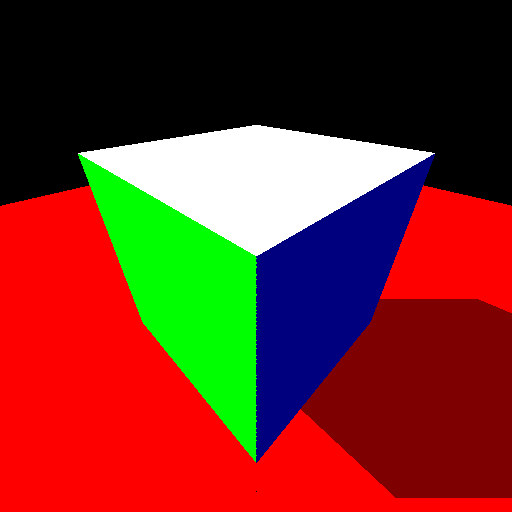

In [2]:
from IPython.display import Image
Image("test.png")

## Summary

After participating in this module, you should be able to:

* Initialize the Embree device.
* Define basic geometries and scenes, and bind them to the Embree device.
* Use the scalar intersect and occlusion Embree functions **rtcIntersect1** and **rtcOccluded1** and calculate light, color, and shadow values.
* Launch tile rendering tasks in parallel and write to the framebuffer.

## Links to Function Documentation
* [rtcIntersect1](https://www.embree.org/api.html#rtcintersect1)
* [rtcOccluded1](https://www.embree.org/api.html#rtcoccluded1)


***

[Back: Overview](../Overview.ipynb)